In [36]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold

In [37]:

# df_TagDesc = pd.read_csv(r'C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\CSV\Not for Processing\TagDesc.csv')

# df_All_1 = pd.read_csv(r'C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\1 Preprocess\Merge Data\contData_all_Avg_1o2.csv')
# df_All_2 = pd.read_csv(r'C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\1 Preprocess\Merge Data\contData_all_Avg_2o2.csv')
# # Concatenate (union) the dataframes
# df_All = pd.concat([df_All_1, df_All_2], ignore_index=True)

df_All = pd.read_csv(r'C:\Users\austinsh\Project-OptiC4\III Models\3 Model C4\3 Feature Selection\filtered-out_5-9_corr.csv')

print(df_All.head())


                  Date  425_pct_Al     Al2O3  M_Value  C4_pct_Eth  C4_pct_H2O  \
0  2012-05-17 09:00:00    6.319560  11.41670  3.50773    2.554580     22.0531   
1  2012-05-17 10:00:00    6.319915  11.40835  3.50797    2.555935     22.0557   
2  2012-05-17 12:00:00    6.320970  11.39165  3.50869    2.560005     22.0636   
3  2012-05-18 08:00:00    6.328690  11.39165  3.51401    2.540370     22.0604   
4  2012-05-18 09:00:00    6.336060  11.40500  3.51910    2.514430     22.0484   

   HydWtr_pct_Ammonia  C4_pct_Hex  HydWtr_Na2O  Butanol   DI55102   DI55152  \
0            0.867508    0.670721     3.354160  30.3662  0.965043  0.924515   
1            0.864729    0.671059     3.306475  30.3662  0.965043  0.924515   
2            0.856391    0.672071     3.163420  30.6785  0.965043  0.924515   
3            0.811652    0.674174     2.238130  32.6454  0.971625  0.933431   
4            0.773793    0.675408     1.391475  32.6454  0.971625  0.933431   

    DI55580   FC55003   FC55552   FC55

### Include

In [38]:
# selected_columns = ['Butanol', 
#                     'FC55569',
#                     'DI55152',
#                     '425 %Al',
#                     'TC55552',
#                     'FC55003',
#                     'LC55555',
#                     'FFC55553',
#                     'FFC55555',
#                     'TC55555',
#                     'TI55021',
#                     'PI55004',
#                     'FC55552'
#                     ]
# existing_columns = [col for col in selected_columns if col in df_All.columns]
# df_All = df_All[existing_columns]

# print(df_All.head())

In [39]:
# Set max columns to display
pd.set_option('display.max_columns', None)

### Exlcude

In [40]:
# List of columns to exclude to run XGboost feature selection
exclude_columns = ['Date', 
                   'LC55553',
                   'TC55555',
                   'PI55020',
                   'TC55553',
                   'TI55021',
                   'LC55553',
                   'LC55568',
                   'TI40050',
                   'TI55023',
                   'PI55004'


            #      'C4_pct_Hex', 'HydWtr_Na2O',
            #       # No improvement after dropping:
            #      'TC55555'
            #    #   MSE Train	RMSE Train	R2 Train	MSE Test	RMSE Test	R2 Test
            #    #   7.935280	2.8169630	0.90869	12.1856	3.490801	   0.8677



                   
                   ]

# Create a new DataFrame without the excluded columnsd
df_All = df_All.drop(columns=exclude_columns)

In [41]:
df_All.columns

Index(['425_pct_Al', 'Al2O3', 'M_Value', 'C4_pct_Eth', 'C4_pct_H2O',
       'HydWtr_pct_Ammonia', 'C4_pct_Hex', 'HydWtr_Na2O', 'Butanol', 'DI55102',
       'DI55152', 'DI55580', 'FC55003', 'FC55552', 'FC55569', 'FC55576',
       'FFC55553', 'FFC55555', 'LC52572', 'LC55557', 'LC90366', 'LC90368',
       'TC55552'],
      dtype='object')

In [42]:
# df_All = df_All[df_All['Date'] > '2020-06-15 00:00:00']

In [43]:
# df_All.drop('Date', axis=1, inplace=True)

In [44]:
print(df_All.describe())

         425_pct_Al         Al2O3       M_Value    C4_pct_Eth    C4_pct_H2O  \
count  40127.000000  40127.000000  40127.000000  40127.000000  40127.000000   
mean       6.133716     11.382607      3.597077      1.213887     21.178645   
std        0.228800      0.547831      0.179868      0.691779      2.750323   
min        5.270185      9.740945      1.255950      0.030786      7.714985   
25%        6.003510     11.095875      3.502715      0.621701     18.843125   
50%        6.135865     11.495850      3.588030      1.103350     21.462900   
75%        6.265830     11.719825      3.682920      1.687807     23.275925   
max        7.026215     12.879900      5.827565      9.466675     34.151950   

       HydWtr_pct_Ammonia    C4_pct_Hex   HydWtr_Na2O       Butanol  \
count        40127.000000  40127.000000  40127.000000  40127.000000   
mean             0.967938      0.471411      0.789919      9.218873   
std              0.146452      0.241196      0.686560      8.828021   
min 

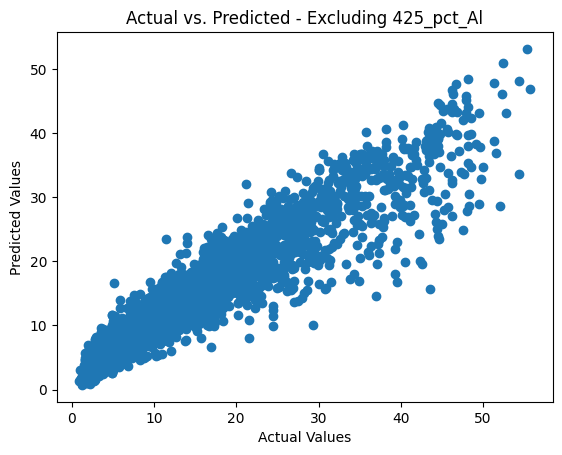

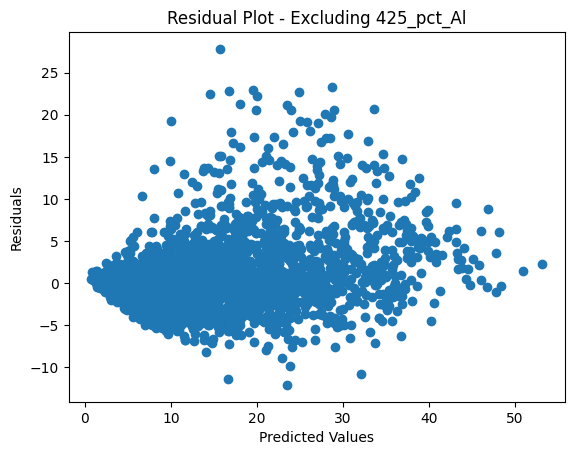

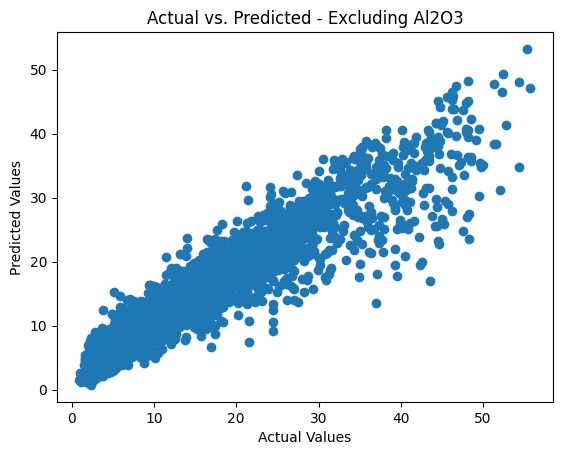

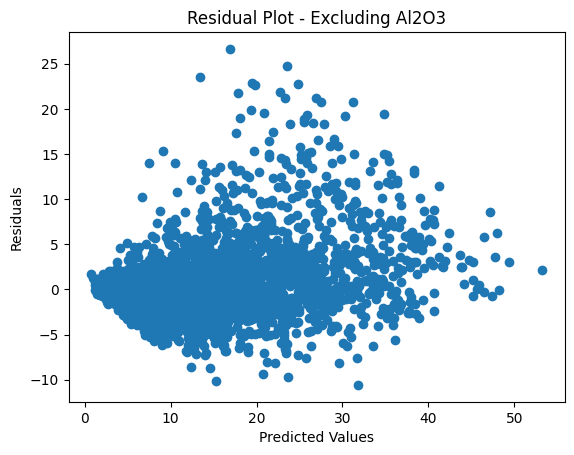

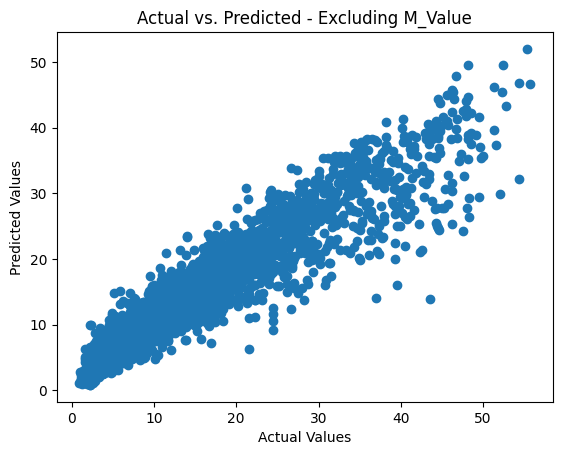

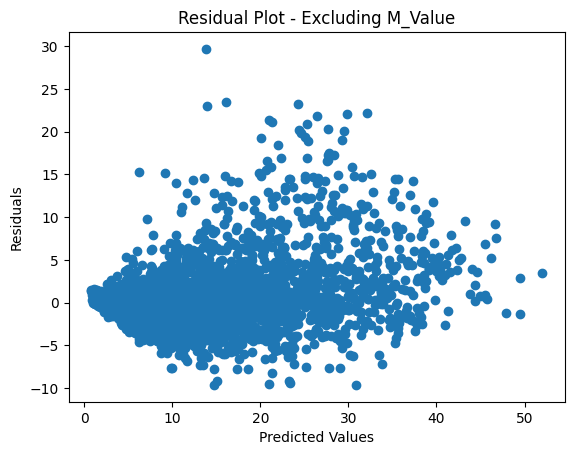

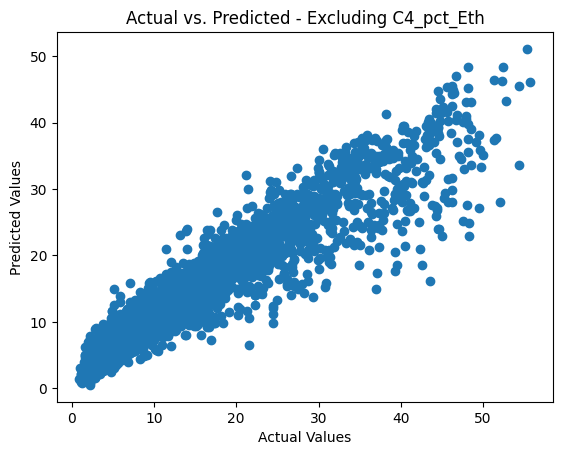

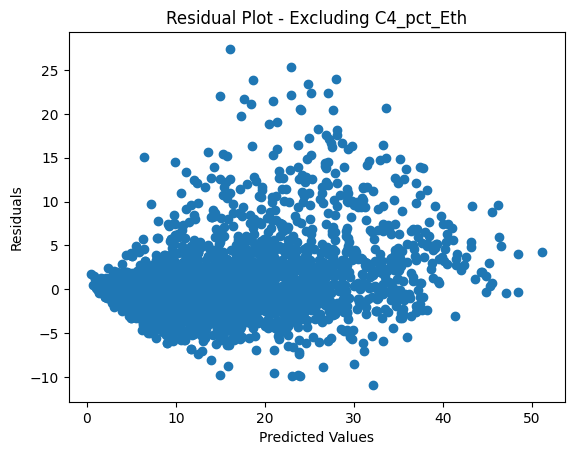

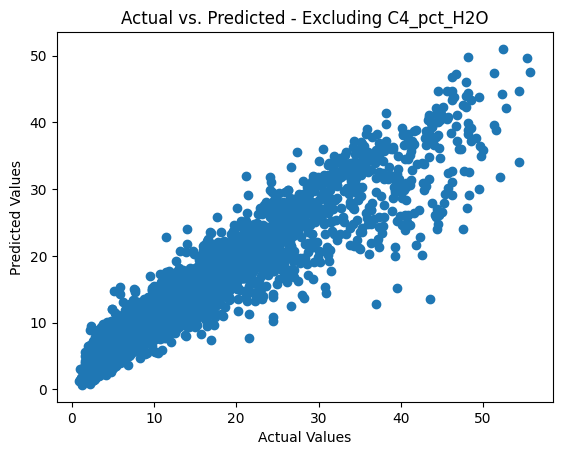

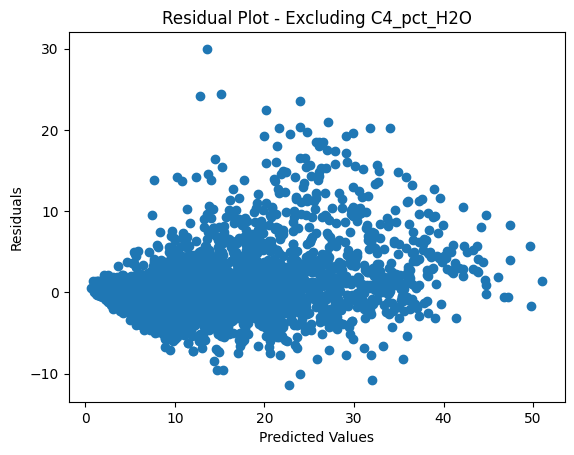

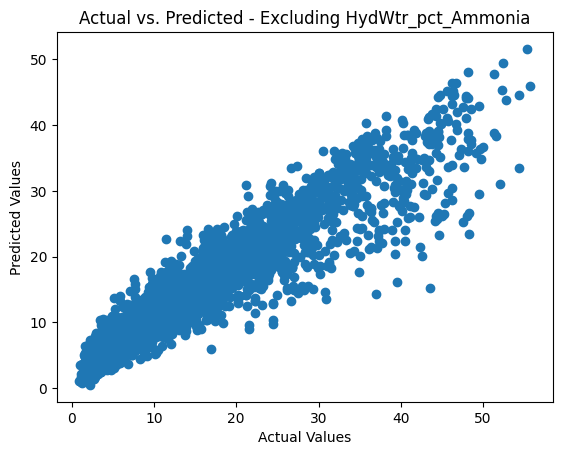

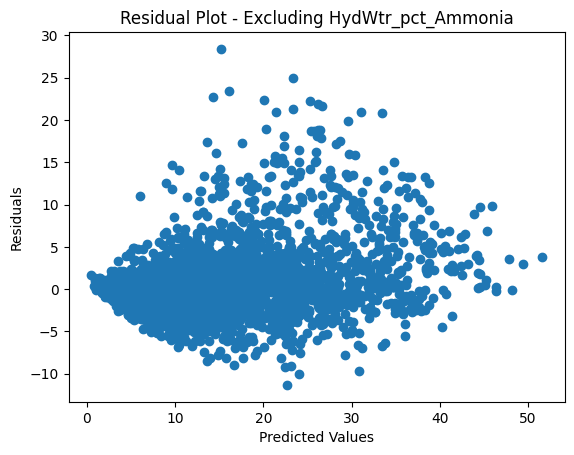

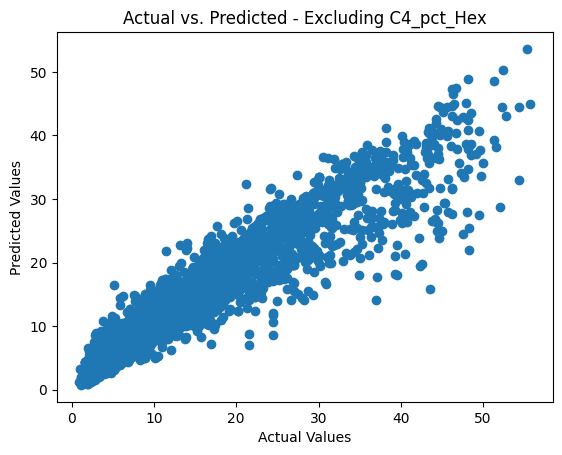

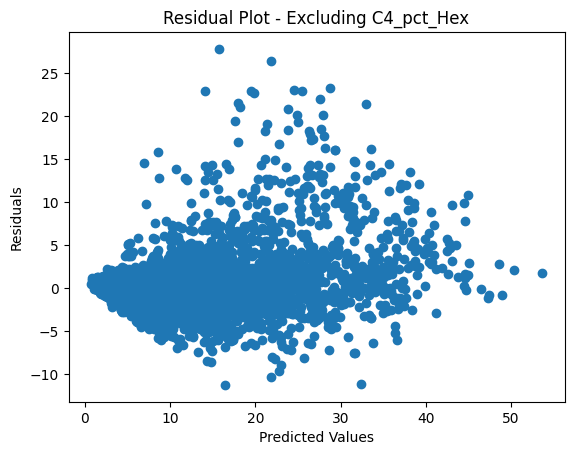

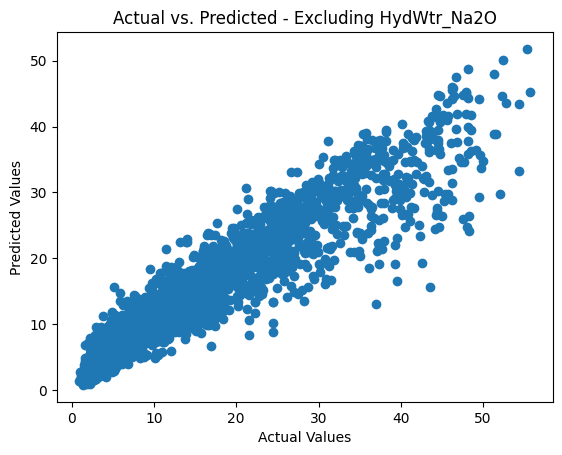

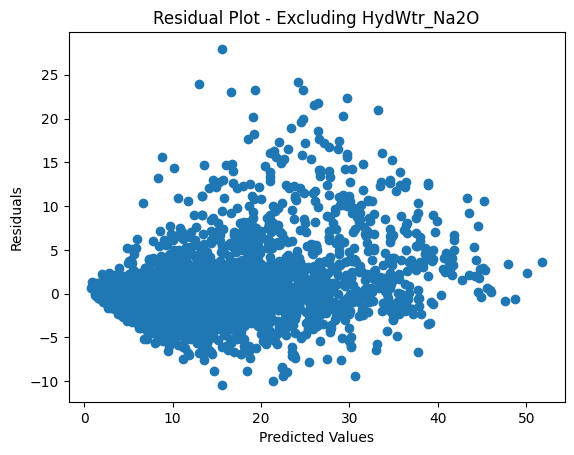

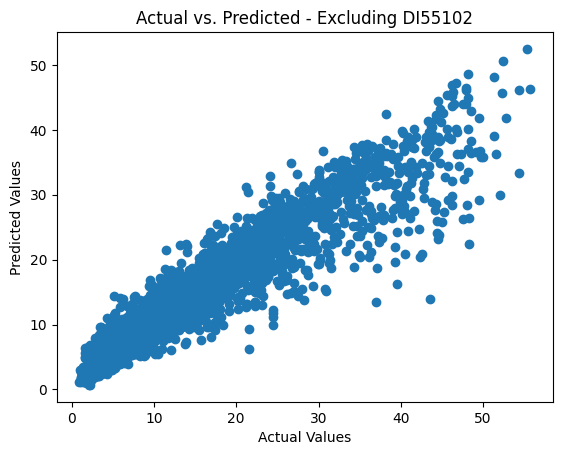

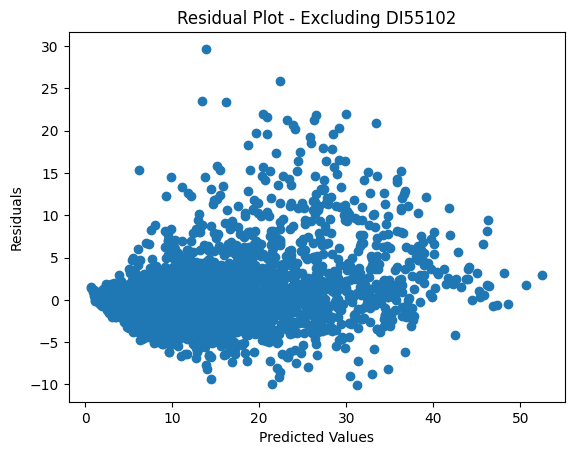

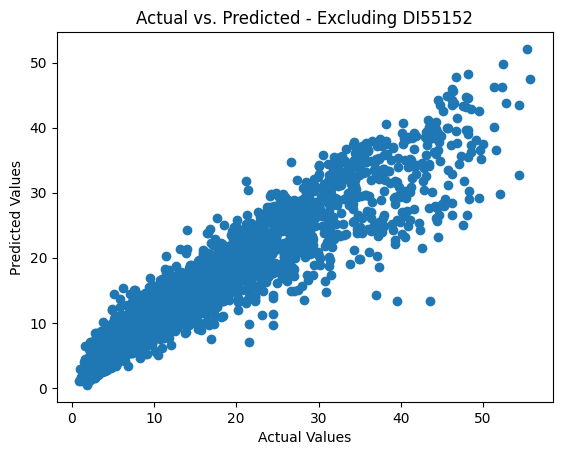

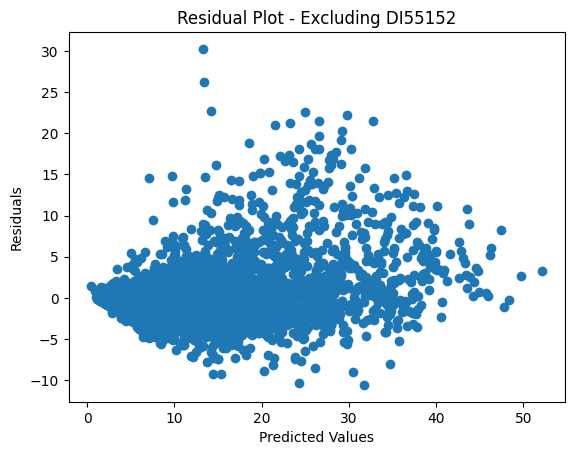

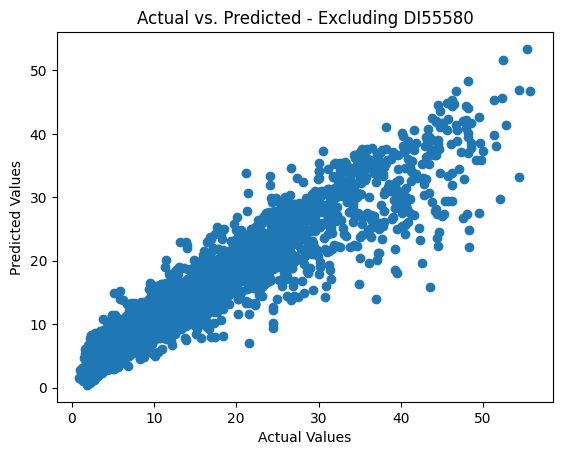

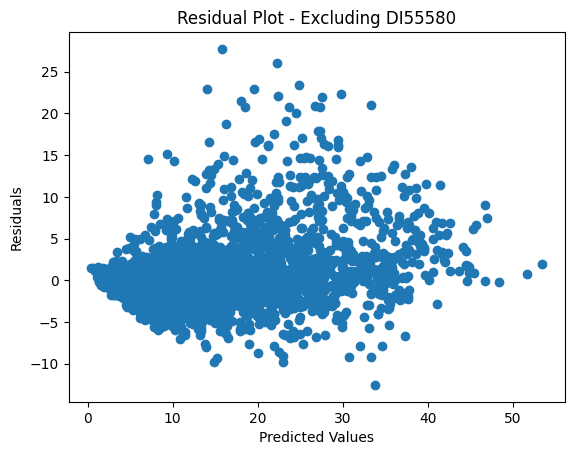

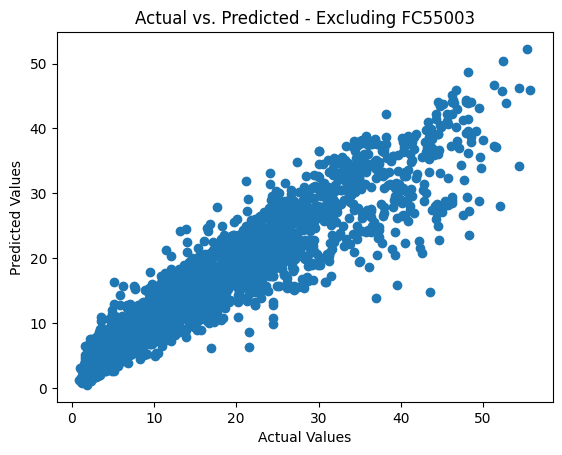

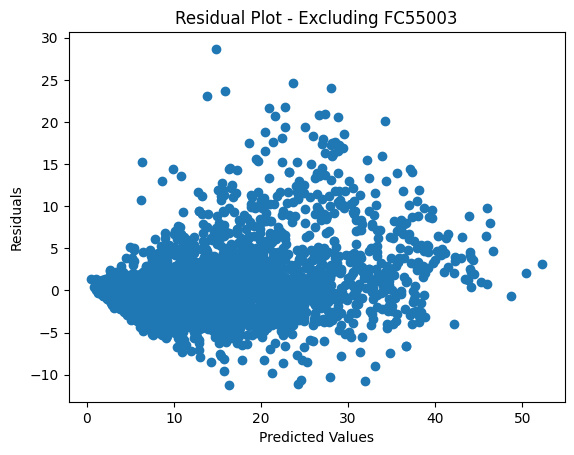

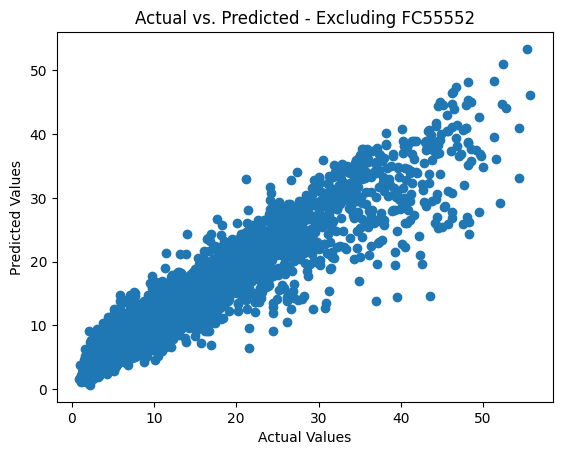

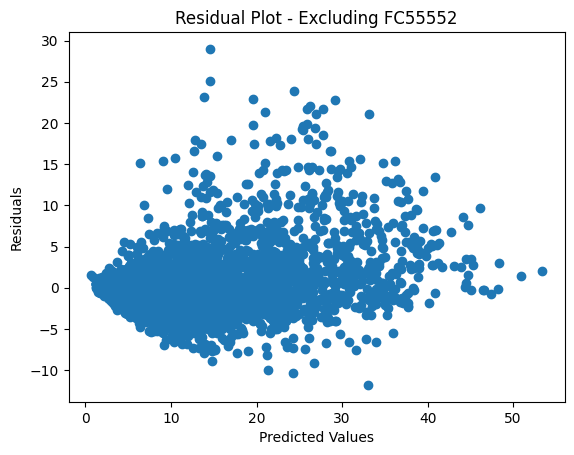

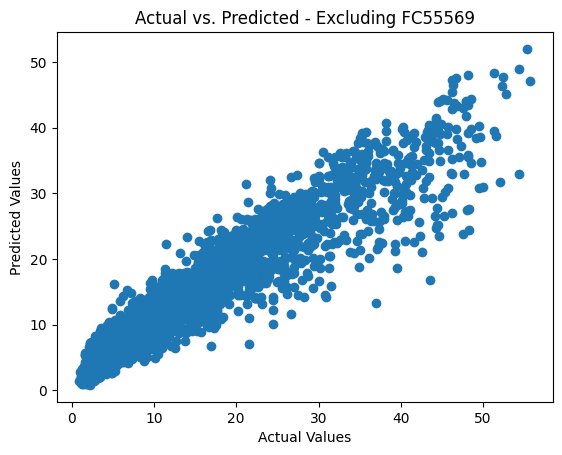

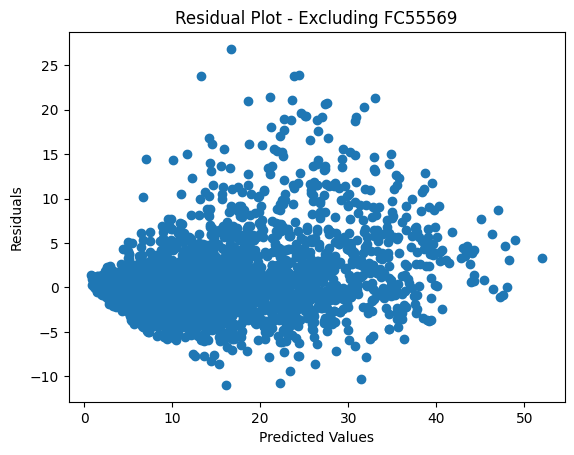

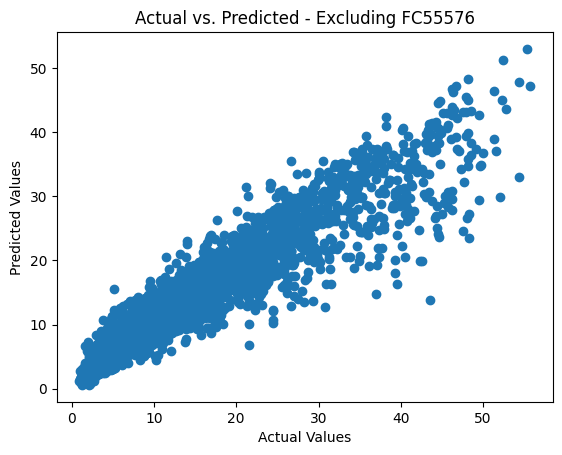

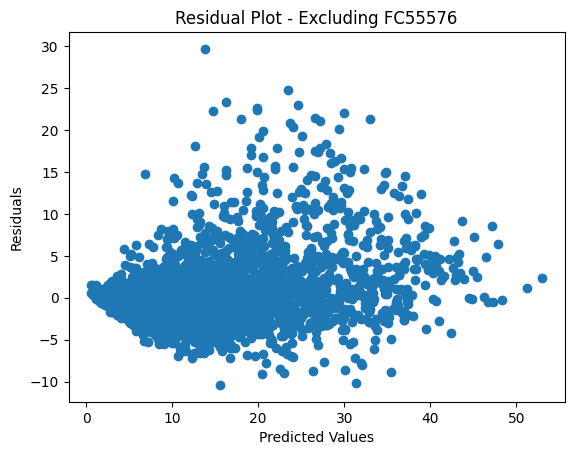

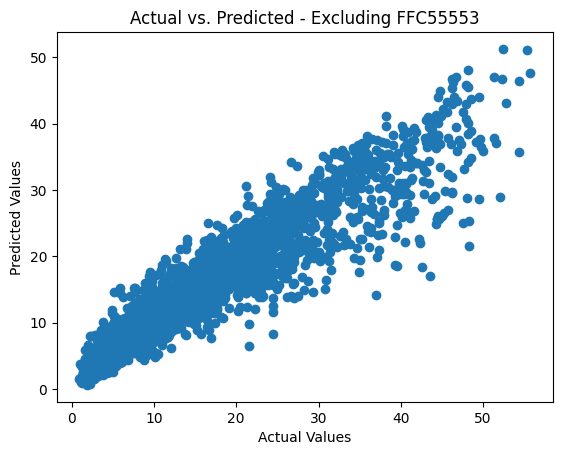

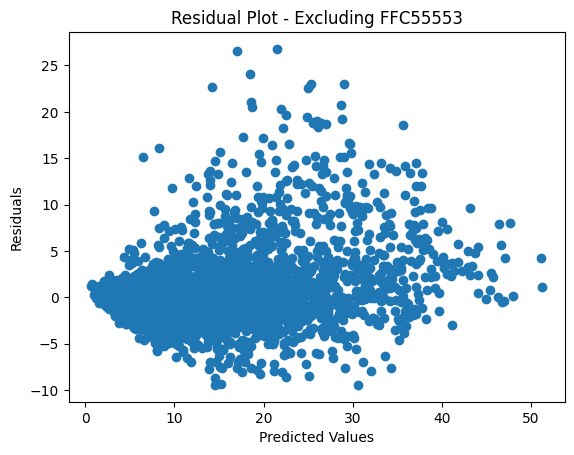

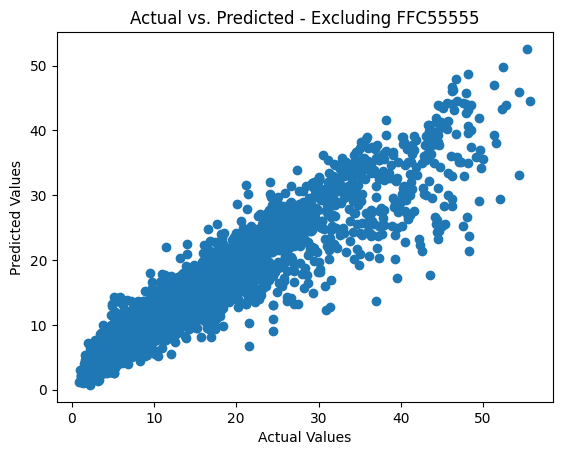

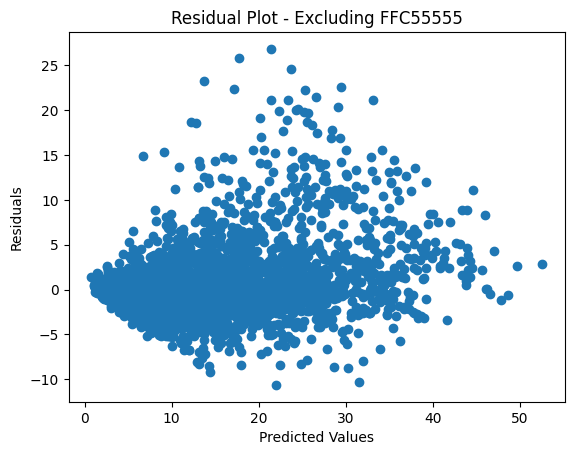

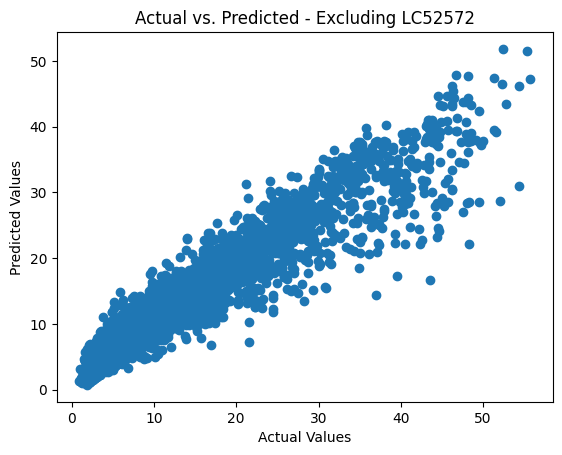

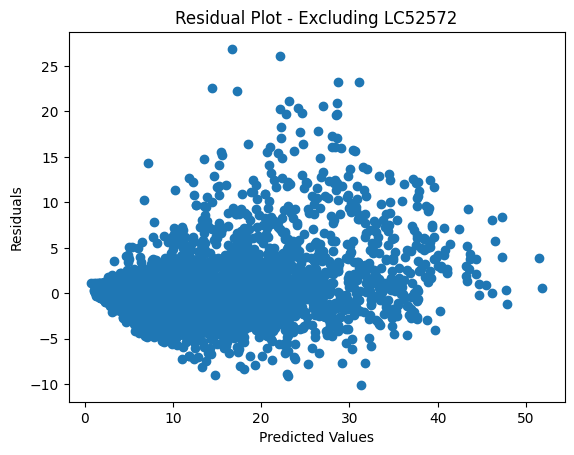

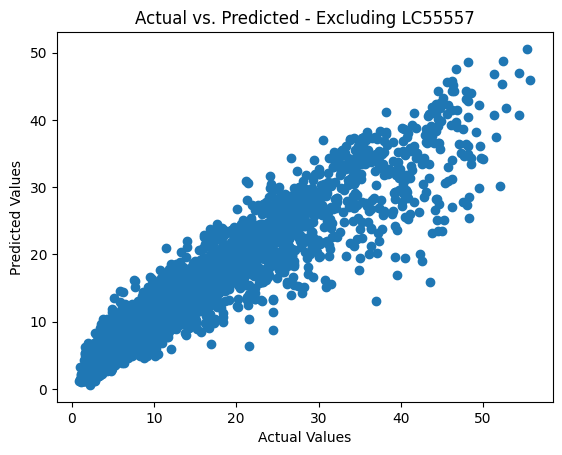

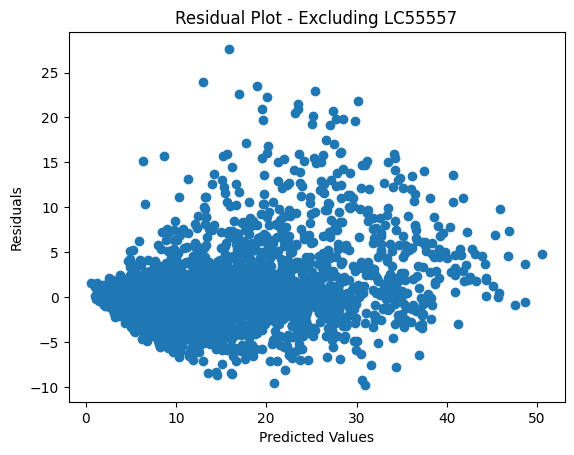

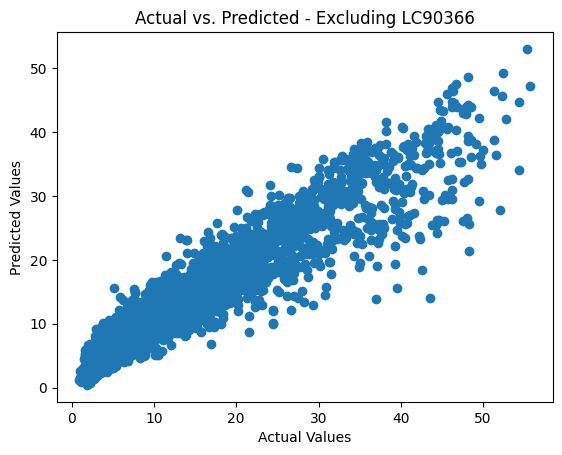

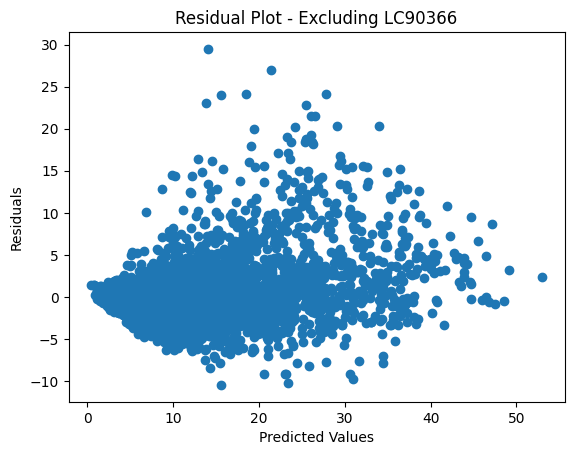

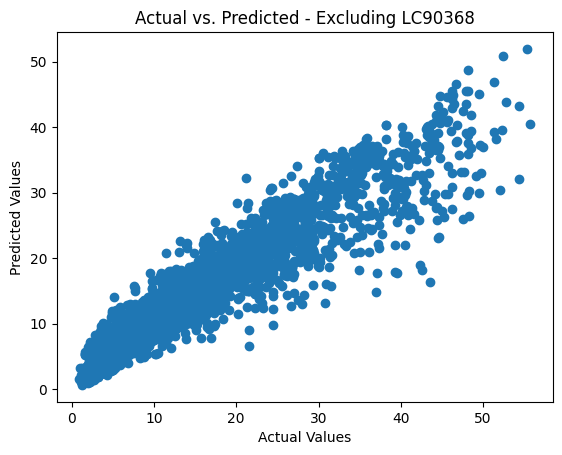

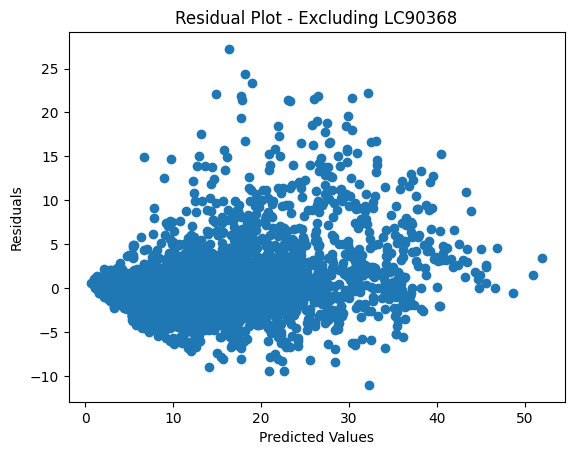

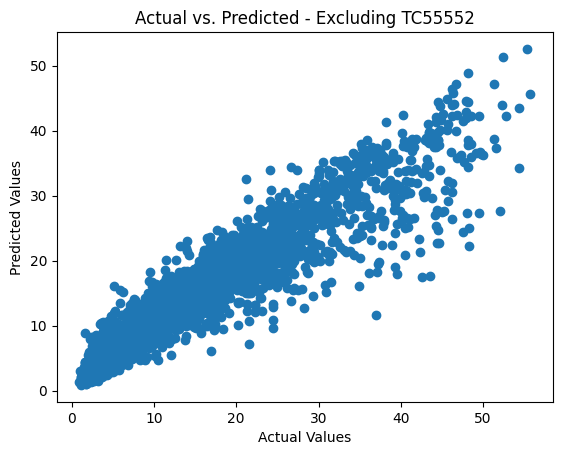

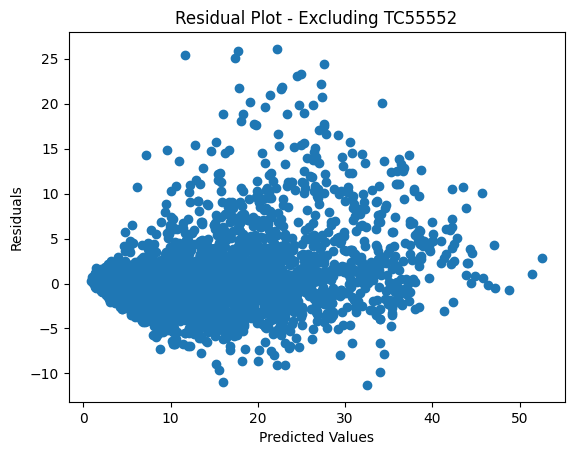

Feature Excluded: 425_pct_Al
MSE Train: 3.8639898581186025
RMSE Train: 1.9657034003426364
R2 Train: 0.950625746107348
MSE Test: 6.844053024002128
RMSE Test: 2.6161141076035137
R2 Test: 0.9106792448173389


Feature Excluded: Al2O3
MSE Train: 3.9113988336478864
RMSE Train: 1.9777256719898961
R2 Train: 0.9500199518686143
MSE Test: 6.899505675524463
RMSE Test: 2.6266910125716088
R2 Test: 0.9099555402093404


Feature Excluded: M_Value
MSE Train: 3.9173164196984476
RMSE Train: 1.9792211649278733
R2 Train: 0.9499443366608057
MSE Test: 6.865328308654219
RMSE Test: 2.620177152151018
R2 Test: 0.9104015841263439


Feature Excluded: C4_pct_Eth
MSE Train: 4.052831760360221
RMSE Train: 2.0131646133290295
R2 Train: 0.9482127149221706
MSE Test: 7.017069834587472
RMSE Test: 2.6489752423507986
R2 Test: 0.9084212272177409


Feature Excluded: C4_pct_H2O
MSE Train: 3.939900557782942
RMSE Train: 1.9849182748372645
R2 Train: 0.9496557554251723
MSE Test: 6.822861549095972
RMSE Test: 2.612060785873095
R2 Test:

In [45]:

def feature_iteration_model(df, target_column_name, plot_results=False):
    original_features = df.drop(target_column_name, axis=1).columns
    model_performance = {}

    for feature in original_features:
        X = df.drop([target_column_name, feature], axis=1)
        y = df[target_column_name]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        xgb_model = xgb.XGBRegressor(
            objective ='reg:squarederror', 
            learning_rate=0.03,
            n_estimators=600,
            max_depth=7,
            subsample=0.9,
            colsample_bytree=0.8,
            gamma=2.0,
            alpha=0.2,
            reg_lambda=2,
            colsample_bylevel=0.8,
            colsample_bynode=0.7
        )
        xgb_model.fit(X_train, y_train)

        # Predict and evaluate on training data
        y_train_pred = xgb_model.predict(X_train)
        mse_train = mean_squared_error(y_train, y_train_pred)
        rmse_train = np.sqrt(mse_train)
        r2_train = r2_score(y_train, y_train_pred)

        # Predict and evaluate on test data
        y_pred = xgb_model.predict(X_test)
        mse_test = mean_squared_error(y_test, y_pred)
        rmse_test = np.sqrt(mse_test)
        r2_test = r2_score(y_test, y_pred)

        # Store the metrics
        model_performance[feature] = {
            'MSE Train': mse_train,
            'RMSE Train': rmse_train,
            'R2 Train': r2_train,
            'MSE Test': mse_test,
            'RMSE Test': rmse_test,
            'R2 Test': r2_test
        }

        # Plotting (optional)
        if plot_results:
            plt.scatter(y_test, y_pred)
            plt.xlabel('Actual Values')
            plt.ylabel('Predicted Values')
            plt.title(f'Actual vs. Predicted - Excluding {feature}')
            plt.show()

            residuals = y_test - y_pred
            plt.scatter(y_pred, residuals)
            plt.xlabel('Predicted Values')
            plt.ylabel('Residuals')
            plt.title(f'Residual Plot - Excluding {feature}')
            plt.show()

    return model_performance

# Assuming your data is in df_All and you want to predict 'Butanol'
performance_without_each_feature = feature_iteration_model(df_All, 'Butanol', plot_results=True)

# Print or analyze the performance dictionary
for feature, metrics in performance_without_each_feature.items():
    print(f"Feature Excluded: {feature}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("\n")


In [46]:
# Assuming performance_without_each_feature is your model_performance dictionary
performance_df = pd.DataFrame.from_dict(performance_without_each_feature, orient='index')

print(performance_df) 

                    MSE Train  RMSE Train  R2 Train  MSE Test  RMSE Test  \
425_pct_Al           3.863990    1.965703  0.950626  6.844053   2.616114   
Al2O3                3.911399    1.977726  0.950020  6.899506   2.626691   
M_Value              3.917316    1.979221  0.949944  6.865328   2.620177   
C4_pct_Eth           4.052832    2.013165  0.948213  7.017070   2.648975   
C4_pct_H2O           3.939901    1.984918  0.949656  6.822862   2.612061   
HydWtr_pct_Ammonia   4.037680    2.009398  0.948406  6.972568   2.640562   
C4_pct_Hex           3.810518    1.952055  0.951309  6.889292   2.624746   
HydWtr_Na2O          3.905312    1.976186  0.950098  6.823400   2.612164   
DI55102              3.871691    1.967661  0.950527  6.874392   2.621906   
DI55152              3.876062    1.968772  0.950471  6.891211   2.625112   
DI55580              3.867677    1.966641  0.950579  6.862544   2.619646   
FC55003              4.003616    2.000904  0.948842  7.012544   2.648121   
FC55552     

In [47]:
performance_df.to_csv('feature_test.csv', index=True)